In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as stats

In [3]:
sample_data_1r = pd.read_csv('250_sample_1_Results.csv')
sample_data_2r = pd.read_csv('250_sample_2_Results.csv')
sample_data_3r = pd.read_csv('250_sample_3_Results.csv')
sample_data_4r = pd.read_csv('250_sample_4_Results.csv')
sample_data_5r = pd.read_csv('250_sample_5_Results.csv')
sample_data_results = pd.concat ([sample_data_1r,sample_data_2r,sample_data_3r,sample_data_4r,sample_data_5r])
sample_data_results.head(100)


,zip_code,total,non_hispanic_tot,Not Hispanic or Latino householder: - Householder who is White alone,Not Hispanic or Latino householder: - Householder who is Black or African American alone,Not Hispanic or Latino householder: - Householder who is American Indian and Alaska Native alone,Not Hispanic or Latino householder: - Householder who is Asian alone,Not Hispanic or Latino householder: - Householder who is Native Hawaiian and Other Pacific Islander alone,Not Hispanic or Latino householder: - Householder who is Some other race alone,Not Hispanic or Latino householder: - Householder who is Two or more races,...,ch_avg_review_ct,ch_avg_rating,mexican_count,mx_tot_review_ct,mx_avg_review_ct,mx_avg_rating,fastfood_count,ff_tot_review_ct,ff_avg_review_ct,ff_avg_rating
0,91606,14717,8083,5931,737,40,693,15,44,623,...,107.80,3.45,98,18524,189.02,3.97,52,9020,173.46,5.19
1,98116,10571,10276,9422,153,76,352,16,21,236,...,164.75,3.38,13,2689,206.85,3.58,6,558,93.00,2.92
2,13035,2919,2890,2855,12,3,8,1,0,11,...,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00
3,78516,7193,1961,1910,7,6,5,0,2,31,...,0.00,0.00,2,2,1.00,4.50,0,0,0.00,0.00
4,50125,6296,6263,6200,16,10,14,0,2,21,...,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00
5,60610,28638,27683,20463,5399,32,1350,20,29,390,...,184.33,3.34,115,75081,652.88,4.73,196,36892,188.22,3.71
6,44138,7303,7224,7051,80,2,56,0,1,34,...,15.00,2.50,2,88,44.00,3.75,2,6,3.00,2.25
7,51503,13048,12856,12677,54,27,43,2,3,50,...,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00
8,29323,5157,5106,4472,553,14,36,1,1,29,...,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00
9,4605,4614,4598,4519,2,23,11,2,2,39,...,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00


In [4]:
list(sample_data_results)

['zip_code',
 'total',
 'non_hispanic_tot',
 'Not Hispanic or Latino householder: - Householder who is White alone',
 'Not Hispanic or Latino householder: - Householder who is Black or African American alone',
 'Not Hispanic or Latino householder: - Householder who is American Indian and Alaska Native alone',
 'Not Hispanic or Latino householder: - Householder who is Asian alone',
 'Not Hispanic or Latino householder: - Householder who is Native Hawaiian and Other Pacific Islander alone',
 'Not Hispanic or Latino householder: - Householder who is Some other race alone',
 'Not Hispanic or Latino householder: - Householder who is Two or more races',
 'hispanic_tot',
 'Hispanic or Latino householder: - Householder who is White alone',
 'Hispanic or Latino householder: - Householder who is Black or African American alone',
 'Hispanic or Latino householder: - Householder who is American Indian and Alaska Native alone',
 'Hispanic or Latino householder: - Householder who is Asian alone',
 'H

In [5]:
sample_data_results['asian_tot'].max()

2676

In [6]:
#plt.scatter(sample_data_results["zip_code"],sample_data_results["hispanic_tot"],marker="o", facecolors="blue", edgecolors="black",
               # s=sample_data_results['mexican_count'],alpha=0.75)


#plt.xlim(0,100000)
#plt.show

<IPython.core.display.Javascript object>


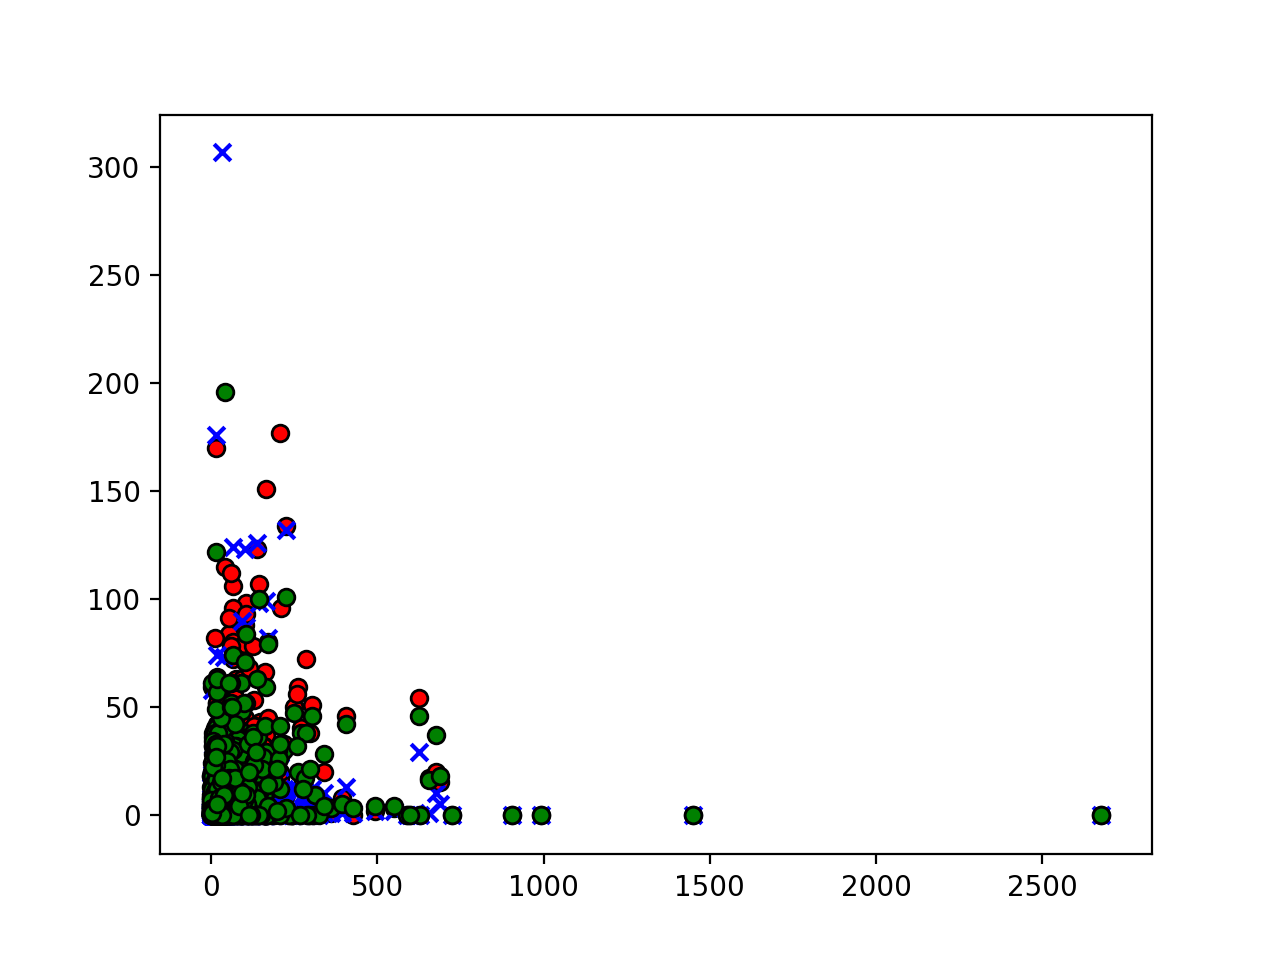

<function matplotlib.pyplot.show(*args, **kw)>

In [7]:
plt.scatter(sample_data_results["asian_tot"],sample_data_results["mexican_count"],marker="o", facecolors="red", edgecolors="black")

plt.scatter(sample_data_results["asian_tot"],sample_data_results["chinese_count"],marker="x", facecolors="blue", edgecolors="black")

plt.scatter(sample_data_results["asian_tot"],sample_data_results["fastfood_count"],marker="o", facecolors="green", edgecolors="black")
#plt.scatter(sample_data["zip_code"],sample_data["black_tot"],marker="o", facecolors="gold", edgecolors="black")

#plt.scatter(sample_data["zip_code"],sample_data["indian_tot"],marker="o", facecolors="LightSkyBlue", edgecolors="black")

#plt.scatter(sample_data["zip_code"],sample_data["asian_tot"],marker="o", facecolors="LightCoral", edgecolors="black")

#plt.scatter(sample_data["zip_code"],sample_data["mixed_tot"],marker="o", facecolors="green", edgecolors="black")



plt.show

<IPython.core.display.Javascript object>


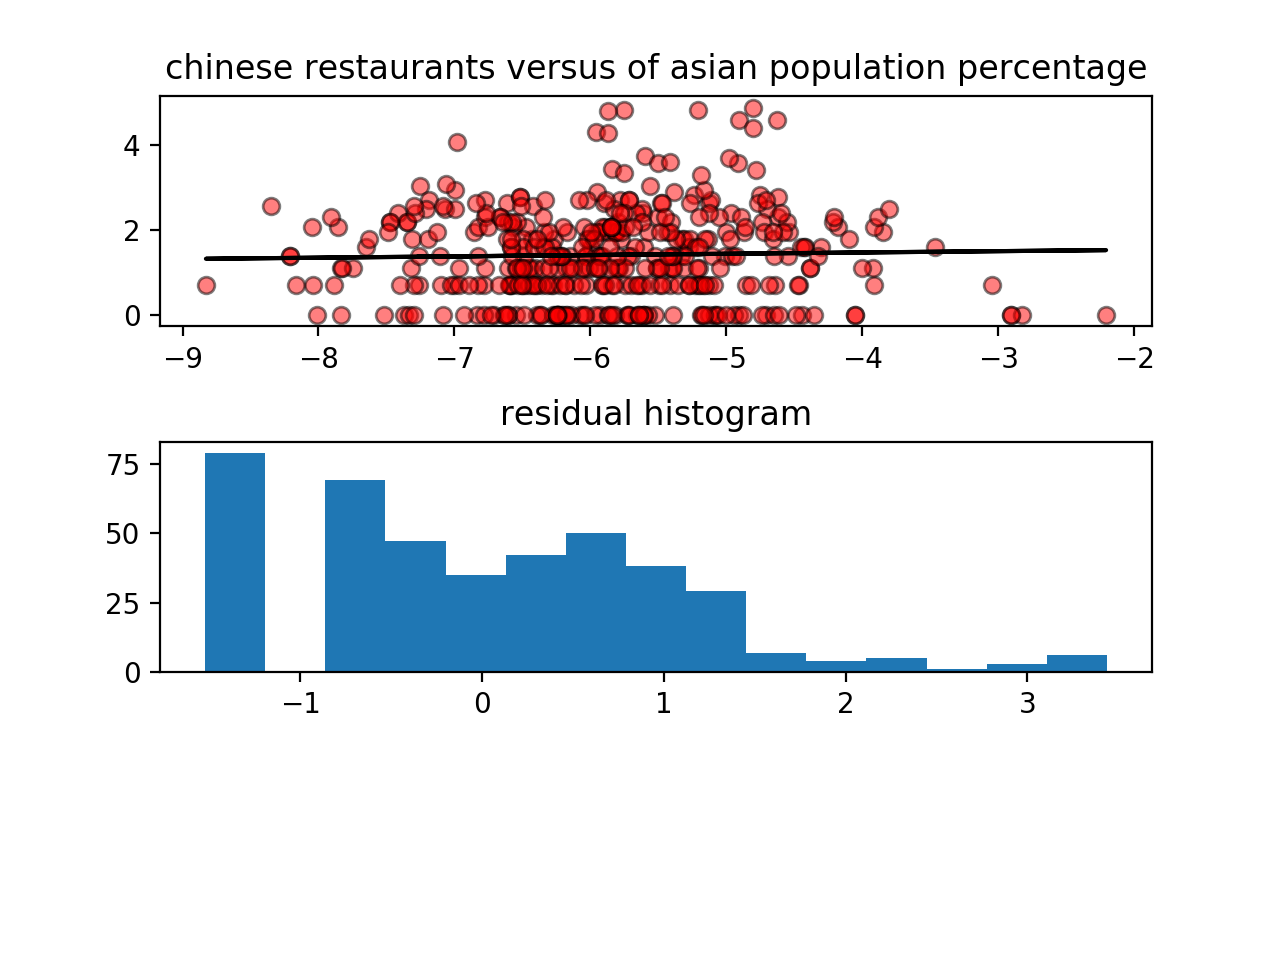

<IPython.core.display.Javascript object>


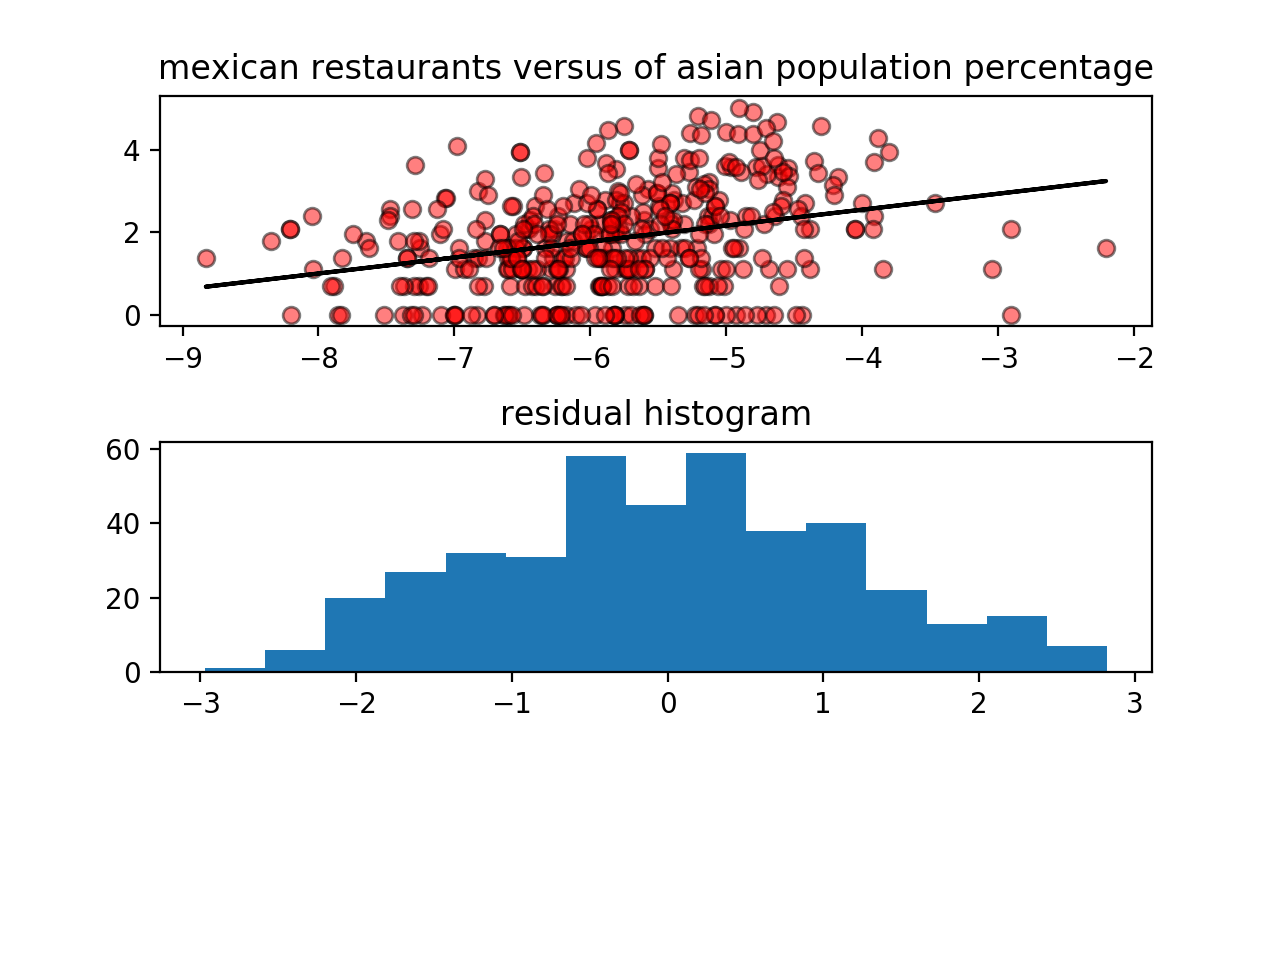

<IPython.core.display.Javascript object>


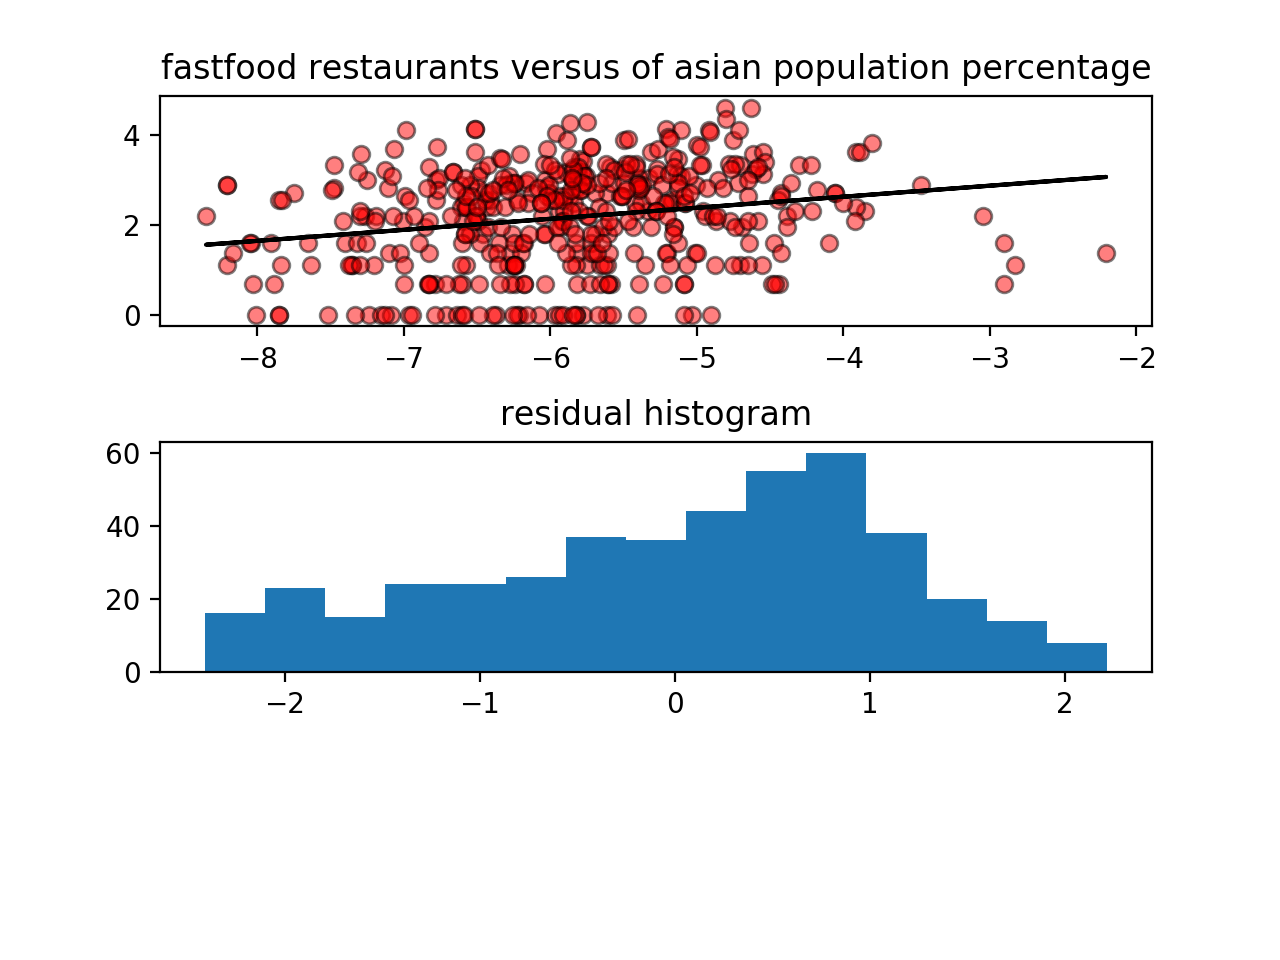

<IPython.core.display.Javascript object>


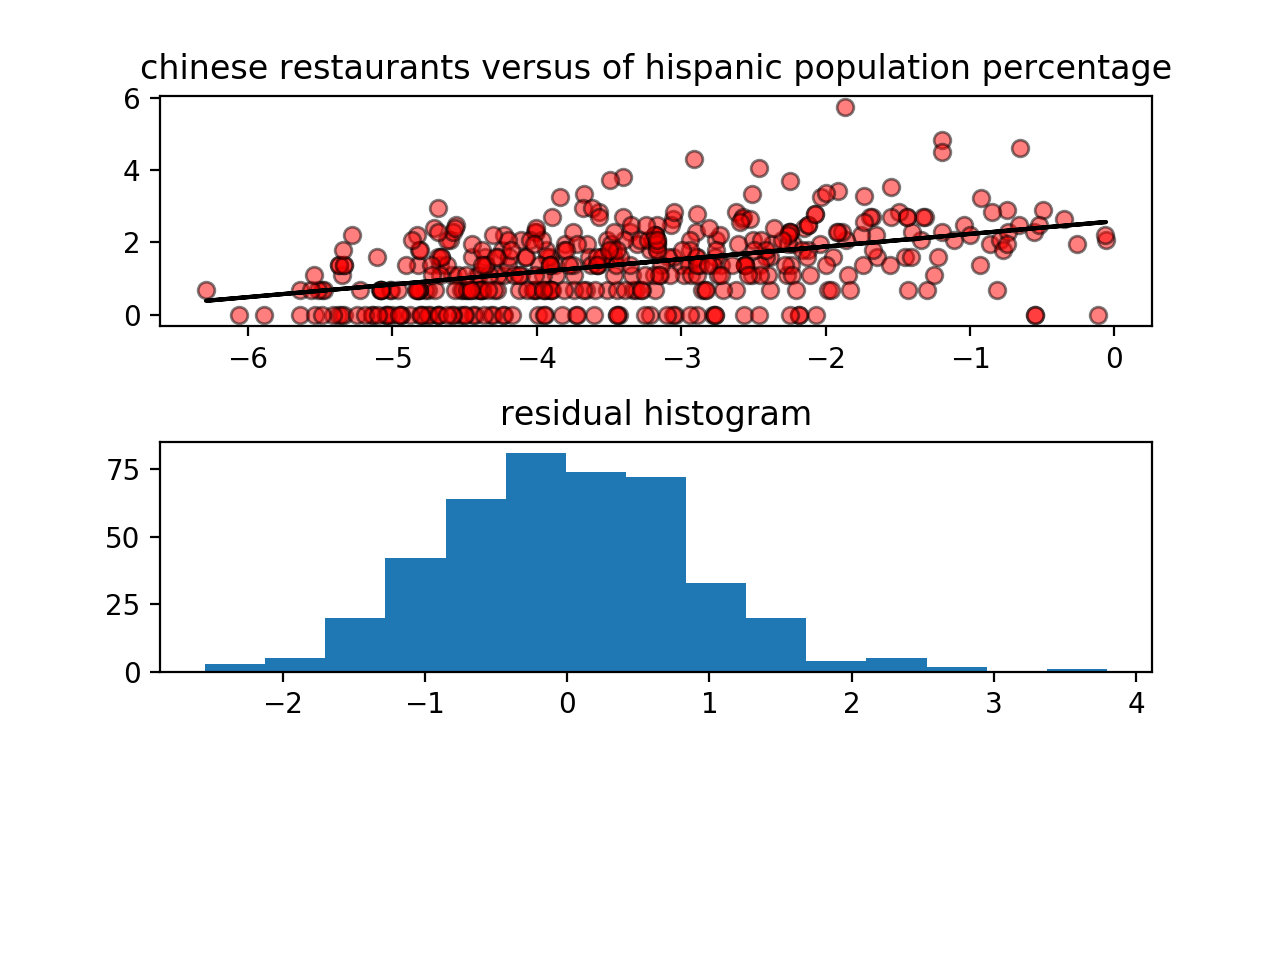

<IPython.core.display.Javascript object>


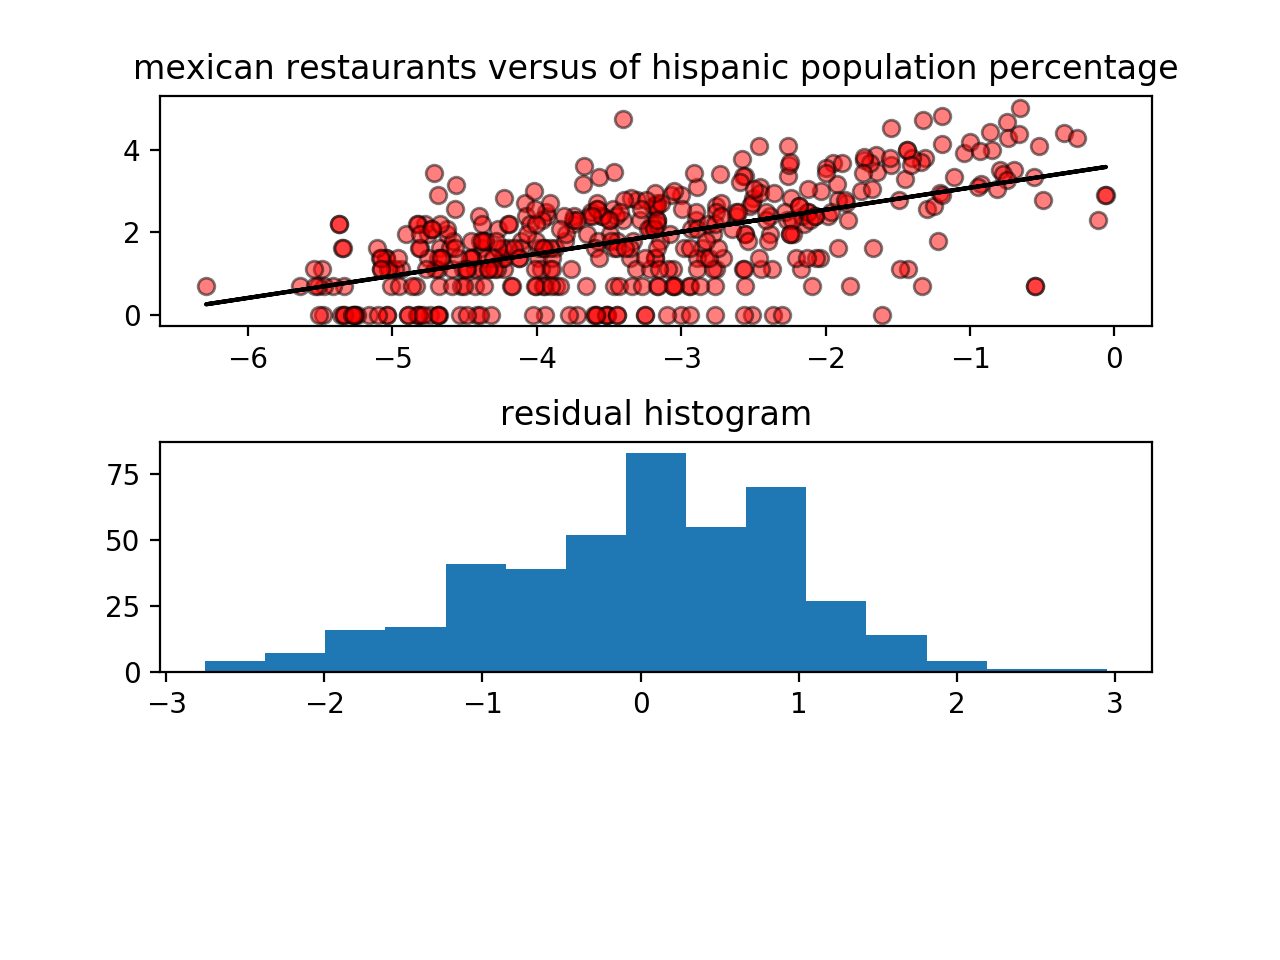

<IPython.core.display.Javascript object>


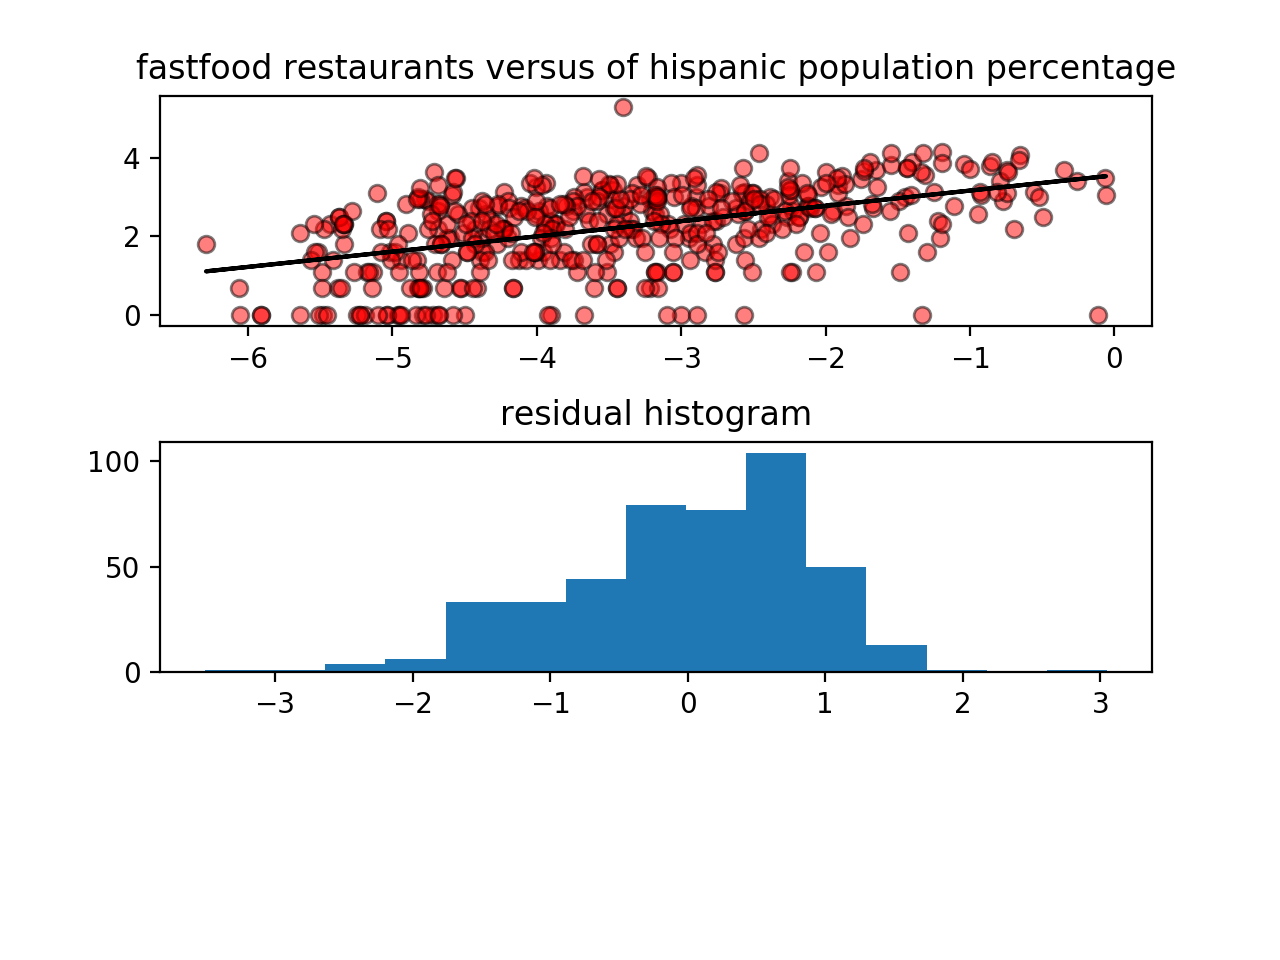

In [29]:
list = ['chinese','mexican','fastfood']
population_list = ['asian','hispanic']
for population_type in population_list:
    for ltype in list:
        foodtype = ltype + '_count'
        pop_type = population_type + '_tot'
        sample_data = sample_data_results.loc[(sample_data_results[foodtype] > 0) & sample_data_results[pop_type] > 0,]
        #get the log of percentage of x race population versus total population
        log_pop_pct = np.log(sample_data[pop_type]/sample_data['total'])
        #get the log of y
        log_count = np.log(sample_data[foodtype])
        slope, intercept, r_value, p_value, std_err = stats.linregress(log_pop_pct,log_count)
        fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols= 1)
        plt.subplots_adjust(left=None, bottom=0.3, right=None, top=0.9, wspace=0.2, hspace=.5)
        ax1.scatter(log_pop_pct,log_count,facecolor = 'red',edgecolors = 'black',alpha = 0.5)
        fit_line = slope *log_pop_pct + intercept
        ax1.plot(log_pop_pct,fit_line,color = 'k')
        ax1.set_title(f'{ltype} restaurants versus {population_type} population percentage')
        residual = log_count - fit_line
        ax2.hist(residual,bins = 15)
        ax2.set_title('residual histogram')
        plt.show()
    
    
    

<IPython.core.display.Javascript object>


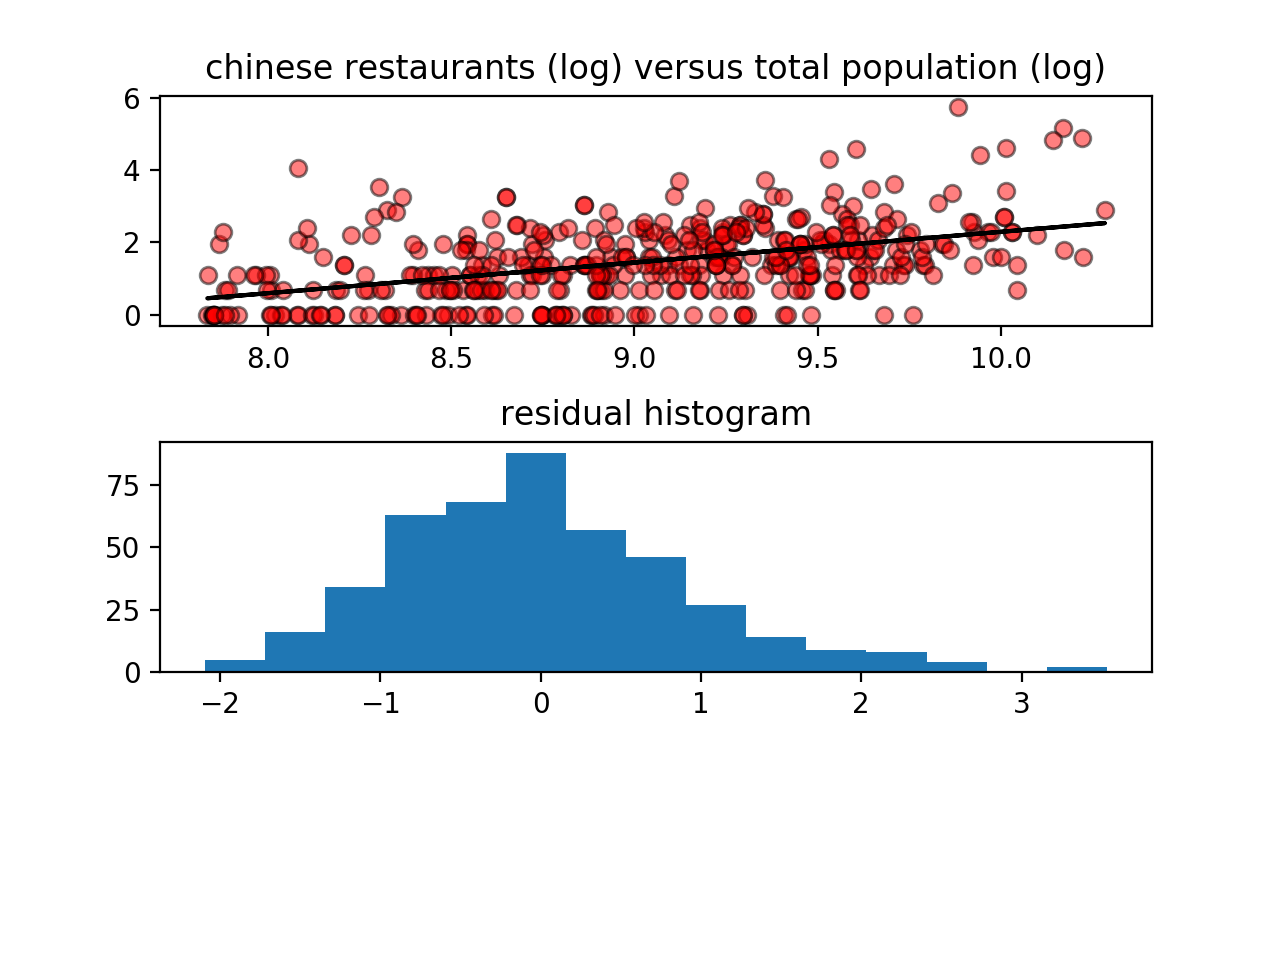

<IPython.core.display.Javascript object>


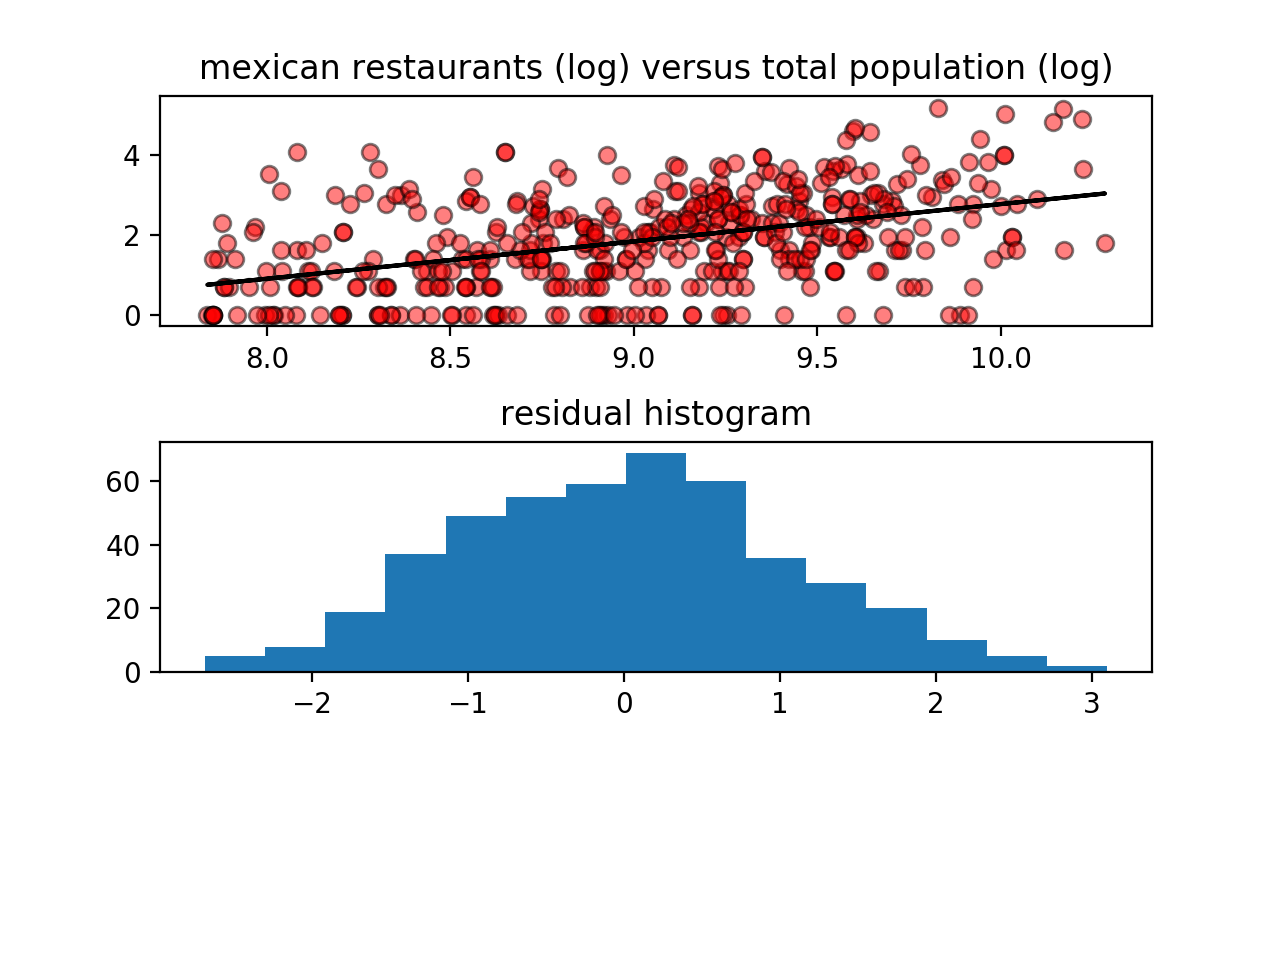

<IPython.core.display.Javascript object>


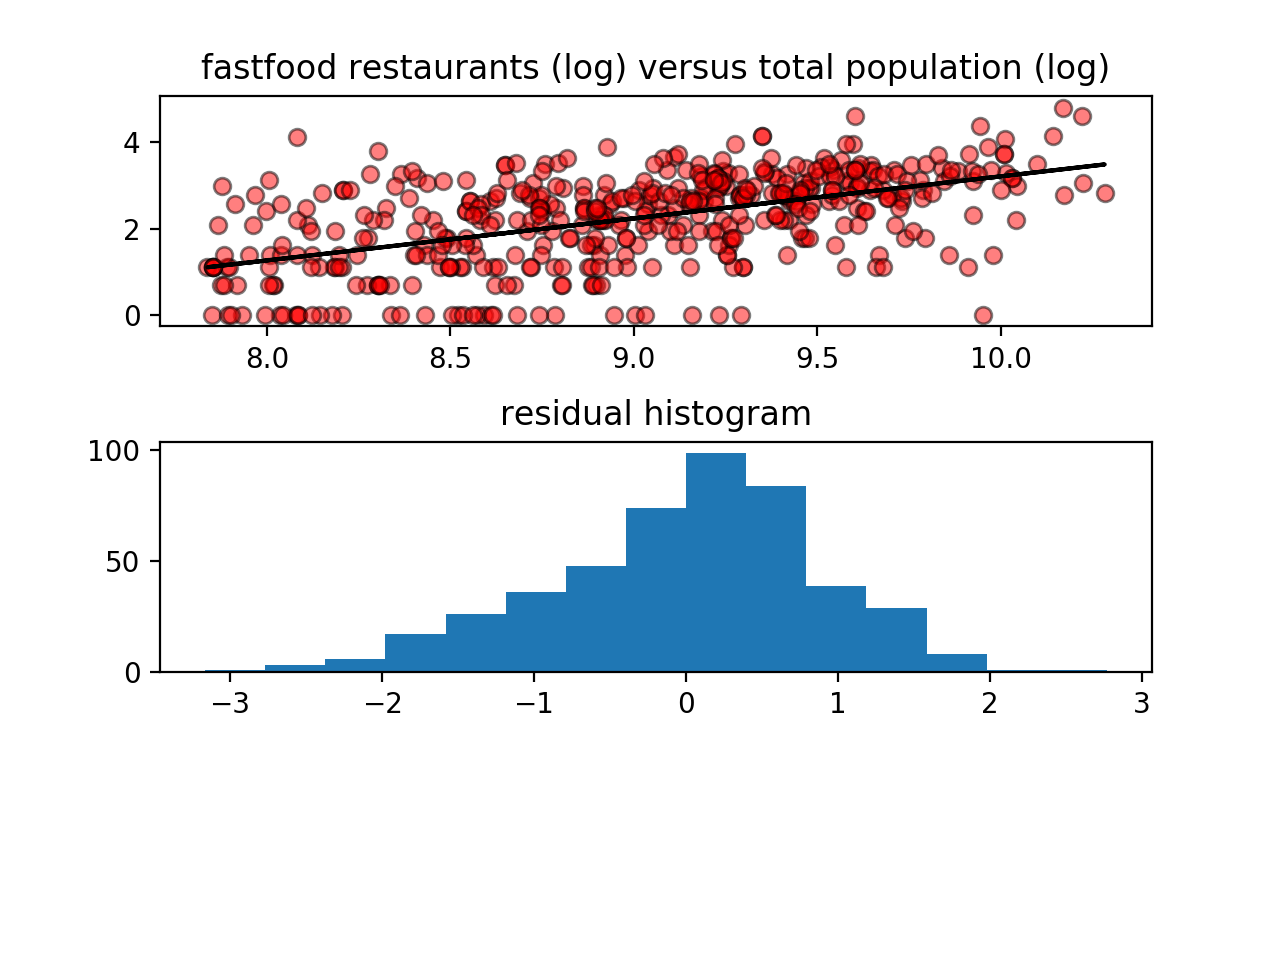

In [37]:
# want to check how each type of the food is relalted with whole population
list = ['chinese','mexican','fastfood']
for ltype in list:
    foodtype = ltype + '_count'
    #pop_type = population_type + '_tot'
    sample_data = sample_data_results.loc[(sample_data_results[foodtype] > 0) & sample_data_results['total'] > 0,]
    #get the log of percentage of x race population versus total population
    log_pop = np.log(sample_data['total'])
    #get the log of y
    log_count = np.log(sample_data[foodtype])
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_pop,log_count)
    fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols= 1)
    plt.subplots_adjust(left=None, bottom=0.3, right=None, top=0.9, wspace=0.2, hspace=.5)
    ax1.scatter(log_pop,log_count,facecolor = 'red',edgecolors = 'black',alpha = 0.5)
    fit_line = slope *log_pop + intercept
    ax1.plot(log_pop,fit_line,color = 'k')
    ax1.set_title(f'{ltype} restaurants (log) versus total population (log)')
    residual = log_count - fit_line
    ax2.hist(residual,bins = 15)
    ax2.set_title('residual histogram')
    plt.show()
    